In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import base64
#!pip install spotipy
import requests
from bs4 import BeautifulSoup
import time
from spotipy.oauth2 import SpotifyClientCredentials
#!pip install spotipy --upgrade
import re

In [3]:
charts_df = pd.read_csv('../data/charts.csv')
lyrics_df = pd.read_csv('../data/billboard_24years_lyrics_spotify.csv')
spotify_qualities_df = pd.read_csv('../data/Hot100.csv')
song_attributes_df = pd.read_csv('../data/songAttributes_1999-2019.csv')

In [4]:
#spotify_qualities_df.info()
updated_song_attributes_df = song_attributes_df.drop(['Unnamed: 0', 'Popularity', 'Album'], axis=1)
updated_song_attributes_df = updated_song_attributes_df.rename(columns={'Name': 'song', 'Artist': 'artist'})
updated_song_attributes_df['artist'] = updated_song_attributes_df['artist'].str.lower()
updated_song_attributes_df['song'] = updated_song_attributes_df['song'].str.lower()
updated_song_attributes_df.head(20)

,Acousticness,artist,Danceability,Duration,Energy,Explicit,Instrumentalness,Liveness,Loudness,Mode,song,Speechiness,Tempo,TimeSignature,Valence
0,0.000728,collective soul,0.520,234947,0.904,False,0.010300,0.0634,-5.030,1,welcome all again,0.0309,106.022,4,0.365
1,0.018200,collective soul,0.581,239573,0.709,False,0.000664,0.1740,-4.909,1,fuzzy,0.0282,120.027,4,0.408
2,0.000473,collective soul,0.572,198400,0.918,False,0.000431,0.0977,-3.324,0,dig,0.0559,144.061,4,0.370
3,0.000970,collective soul,0.596,231453,0.661,False,0.000033,0.1130,-5.051,1,you,0.0254,111.975,4,0.183
4,0.000036,collective soul,0.520,222520,0.808,False,0.000010,0.0800,-4.553,0,my days,0.0318,92.721,4,0.666
5,0.010600,collective soul,0.353,263880,0.754,False,0.000073,0.1200,-4.570,1,understanding,0.0452,138.003,4,0.546
6,0.043600,collective soul,0.629,214973,0.787,False,0.000047,0.1000,-5.657,1,staring down,0.0277,100.440,4,0.476
7,0.000402,collective soul,0.646,206067,0.853,False,0.000090,0.1170,-4.685,1,she does,0.0278,127.963,4,0.699
8,0.000521,collective soul,0.645,216400,0.840,False,0.000011,0.0370,-4.995,1,lighten up,0.0697,140.025,4,0.795
9,0.000380,collective soul,0.601,212013,0.861,False,0.000002,0.1310,-4.690,1,love,0.0319,120.017,4,0.615


In [5]:
updated_song_attributes_df = updated_song_attributes_df.drop_duplicates(subset=['artist', 'song'])
updated_song_attributes_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 130191 entries, 0 to 154930
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Acousticness      130191 non-null  float64
 1   artist            130191 non-null  object 
 2   Danceability      130191 non-null  float64
 3   Duration          130191 non-null  int64  
 4   Energy            130191 non-null  float64
 5   Explicit          130191 non-null  bool   
 6   Instrumentalness  130191 non-null  float64
 7   Liveness          130191 non-null  float64
 8   Loudness          130191 non-null  float64
 9   Mode              130191 non-null  int64  
 10  song              130191 non-null  object 
 11  Speechiness       130191 non-null  float64
 12  Tempo             130191 non-null  float64
 13  TimeSignature     130191 non-null  int64  
 14  Valence           130191 non-null  float64
dtypes: bool(1), float64(9), int64(3), object(2)
memory usage: 15.0+ MB


In [6]:
updated_spotify_qualities_df = spotify_qualities_df.drop(['Popularity', 'Album'], axis=1)
updated_spotify_qualities_df = updated_spotify_qualities_df.rename(columns={'Artist': 'main_artist', 'Track': 'song', 'Year': 'year'})
updated_spotify_qualities_df['main_artist'] = updated_spotify_qualities_df['main_artist'].str.lower()
updated_spotify_qualities_df['song'] = updated_spotify_qualities_df['song'].str.lower()
updated_spotify_qualities_df.tail(20)

,song,main_artist,year,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
600,perreo porky,yng lvcas,2023,224842,4,0.887,0.5980,6,-6.890,1,0.1000,0.0990,0.001790,0.1010,0.768,95.010
601,ven hdp,yng lvcas,2023,154666,4,0.831,0.8290,6,-5.887,1,0.0873,0.4500,0.001400,0.0915,0.865,96.969
602,chicken fried,zac brown band,2008,238146,4,0.566,0.7130,6,-4.250,1,0.0418,0.6450,0.000000,0.1140,0.805,169.861
603,colder weather,zac brown band,2010,273893,4,0.667,0.3810,3,-7.494,1,0.0294,0.4550,0.000000,0.1160,0.199,135.975
604,goodbye in her eyes,zac brown band,2012,324266,4,0.411,0.5580,3,-7.393,1,0.0380,0.1620,0.000004,0.0879,0.379,81.274
605,highway 20 ride,zac brown band,2008,229280,4,0.531,0.4030,3,-7.195,1,0.0338,0.5510,0.000014,0.1050,0.431,76.125
606,homegrown,zac brown band,2015,205000,4,0.712,0.8070,6,-3.976,1,0.0297,0.0244,0.000122,0.0905,0.936,105.024
607,jump right in,zac brown band,2013,180813,4,0.699,0.8190,1,-5.111,1,0.0580,0.0886,0.000000,0.1430,0.654,104.020
608,knee deep (feat. jimmy buffett),zac brown band,2010,203173,4,0.715,0.5840,8,-8.231,1,0.0296,0.4320,0.000001,0.0950,0.609,90.990
609,toes,zac brown band,2008,262773,4,0.801,0.7590,11,-5.398,1,0.0378,0.6570,0.000000,0.0897,0.821,129.971


In [7]:
charts_df['date'] = pd.to_datetime(charts_df['date'])
charts_df['year'] = charts_df['date'].dt.year
updated_charts_df = charts_df.drop(['date', 'last-week', 'rank'], axis=1)
updated_charts_df['artist'] = updated_charts_df['artist'].str.lower()
updated_charts_df['song'] = updated_charts_df['song'].str.lower()
updated_charts_df['year'].max()

2021

In [8]:
featured_artists= ['featuring', '&', 'with', 'x']
def extract_featured(artist):
    for featured in featured_artists:
          if featured in artist:
            parts = artist.split(featured)
            if len(parts) > 1:
                return parts[1].strip()
    return None

def extract_main_artist(artist):
    for featured in featured_artists:
        if featured in artist:
            parts = artist.split(featured)
            return parts[0].strip()
    return artist.strip()

updated_charts_df['featured_artist'] = updated_charts_df['artist'].apply(extract_featured)
updated_charts_df['main_artist'] = updated_charts_df['artist'].apply(extract_main_artist)
updated_charts_df.tail(20)

,song,artist,peak-rank,weeks-on-board,year,featured_artist,main_artist
330067,beautiful delilah,chuck berry,81,1,1958,None,chuck berry
330068,blip blop,bill doggett,82,1,1958,None,bill doggett
330069,try the impossible,lee andrews and the hearts,83,1,1958,None,lee andrews and the hearts
330070,summertime blues,eddie cochran,84,1,1958,None,eddie cochran
330071,got a match?,the daddy-o's,85,1,1958,None,the daddy-o's
330072,to be loved,jackie wilson,86,1,1958,None,jackie wilson
330073,jealousy,kitty wells,87,1,1958,None,kitty wells
330074,just like in the movies,the upbeats,88,1,1958,None,the upbeats
330075,blue boy,jim reeves,89,1,1958,None,jim reeves
330076,stay,the ames brothers,90,1,1958,None,the ames brothers


In [26]:
range_updated_charts_df = updated_charts_df[
    (updated_charts_df['year'] >= 1999) &
    (updated_charts_df['year'] <= 2018)]
range_updated_charts_df.tail(20)

,song,artist,peak-rank,weeks-on-board,year,featured_artist,main_artist
119280,angel in disguise,brandy,75,5,1999,None,brandy
119281,i don't want to miss a thing,aerosmith,1,18,1999,None,aerosmith
119282,father of mine,everclear,77,5,1999,None,everclear
119283,never there,cake,81,5,1999,None,cake
119284,it must be love,ty herndon,38,5,1999,None,ty herndon
119285,faded pictures,case & joe,86,2,1999,joe,case
119286,home alone,r. kelly featuring keith murray,65,5,1999,keith murray,r. kelly
119287,hooch,everything,69,5,1999,None,everything
119288,we really shouldn't be doing this,george strait,44,5,1999,None,george strait
119289,fire escape,fastball,86,5,1999,None,fastball


In [27]:
filtered_artist_df = range_updated_charts_df[range_updated_charts_df['main_artist'].isin(updated_song_attributes_df['artist'])]
filtered_artist_df.head(50)

,song,artist,peak-rank,weeks-on-board,year,featured_artist,main_artist
14905,high hopes,panic! at the disco,5,20,2018,None,panic! at the disco
14906,all i want for christmas is you,mariah carey,6,29,2018,None,mariah carey
14909,it's the most wonderful time of the year,andy williams,10,9,2018,None,andy williams
14910,rockin' around the christmas tree,brenda lee,11,26,2018,None,brenda lee
14912,jingle bell rock,bobby helms,13,24,2018,None,bobby helms
14914,girls like you,maroon 5 featuring cardi b,1,30,2018,cardi b,maroon 5
14921,going bad,meek mill featuring drake,6,3,2018,drake,meek mill
14926,last christmas,wham!,27,8,2018,None,wham!
14927,rudolph the red-nosed reindeer,gene autry,27,3,2018,None,gene autry
14932,sleigh ride,the ronettes,33,2,2018,None,the ronettes


In [28]:
updated_song_attributes_df[updated_song_attributes_df['song'] == 'made for you']

,Acousticness,artist,Danceability,Duration,Energy,Explicit,Instrumentalness,Liveness,Loudness,Mode,song,Speechiness,Tempo,TimeSignature,Valence,song_cleaned
124844,0.137,onerepublic,0.637,257493,0.557,False,0.020100,0.0977,-10.196,1,made for you,0.0410,122.044,4,0.400,made for you
147995,0.770,jake owen,0.581,238400,0.441,False,0.000028,0.1110,-6.829,1,made for you,0.0268,82.125,4,0.337,made for you


In [29]:
another_try_df = pd.merge(range_updated_charts_df, updated_song_attributes_df, left_on=['main_artist','song'], right_on=['artist', 'song_cleaned'], how='inner')
another_try_df.head(30)

,song_x,artist_x,peak-rank,weeks-on-board,year,featured_artist,main_artist,Acousticness,artist_y,Danceability,...,Instrumentalness,Liveness,Loudness,Mode,song_y,Speechiness,Tempo,TimeSignature,Valence,song_cleaned
0,high hopes,panic! at the disco,5,20,2018,None,panic! at the disco,0.19300,panic! at the disco,0.579,...,0.000000,0.0640,-2.729,1,high hopes,0.0618,82.014,4,0.681,high hopes
1,all i want for christmas is you,mariah carey,6,29,2018,None,mariah carey,0.16400,mariah carey,0.335,...,0.000000,0.0708,-7.462,1,all i want for christmas is you,0.0386,150.277,4,0.346,all i want for christmas is you
2,it's the most wonderful time of the year,andy williams,10,9,2018,None,andy williams,0.84300,andy williams,0.231,...,0.000002,0.1020,-7.776,1,it's the most wonderful time of the year,0.0405,202.237,3,0.671,it's the most wonderful time of the year
3,rockin' around the christmas tree,brenda lee,11,26,2018,None,brenda lee,0.72800,brenda lee,0.634,...,0.000000,0.1600,-7.710,1,rockin' around the christmas tree,0.0523,70.527,4,0.907,rockin' around the christmas tree
4,jingle bell rock,bobby helms,13,24,2018,None,bobby helms,0.27900,bobby helms,0.532,...,0.000000,0.2060,-4.956,1,jingle bell rock,0.0278,132.987,4,0.818,jingle bell rock
5,girls like you,maroon 5 featuring cardi b,1,30,2018,cardi b,maroon 5,0.55800,maroon 5,0.611,...,0.000001,0.1310,-7.054,1,girls like you,0.0646,59.635,4,0.377,girls like you
6,girls like you,maroon 5 featuring cardi b,1,30,2018,cardi b,maroon 5,0.56800,maroon 5,0.851,...,0.000000,0.1300,-6.825,1,girls like you (feat. cardi b),0.0505,124.959,4,0.448,girls like you
7,going bad,meek mill featuring drake,6,3,2018,drake,meek mill,0.25900,meek mill,0.889,...,0.000000,0.2520,-6.365,0,going bad (feat. drake),0.0905,86.003,4,0.544,going bad
8,rudolph the red-nosed reindeer,gene autry,27,3,2018,None,gene autry,0.88300,gene autry,0.632,...,0.000000,0.2220,-14.056,1,rudolph the red-nosed reindeer,0.0492,142.110,4,0.644,rudolph the red-nosed reindeer
9,feliz navidad,jose feliciano,34,4,2018,None,jose feliciano,0.29800,jose feliciano,0.560,...,0.000000,0.7030,-13.551,1,feliz navidad,0.0918,150.146,4,0.904,feliz navidad


In [107]:
unique_songs = another_try_df.drop_duplicates(subset=['song_cleaned', 'main_artist'])
pd.set_option('display.max_columns', None)
unique_songs.head(40)

,song_x,artist_x,peak-rank,weeks-on-board,year,featured_artist,main_artist,Acousticness,artist_y,Danceability,Duration,Energy,Explicit,Instrumentalness,Liveness,Loudness,Mode,song_y,Speechiness,Tempo,TimeSignature,Valence,song_cleaned
0,high hopes,panic! at the disco,5,20,2018,None,panic! at the disco,0.193000,panic! at the disco,0.579,190947,0.904,False,0.000000,0.0640,-2.729,1,high hopes,0.0618,82.014,4,0.6810,high hopes
1,all i want for christmas is you,mariah carey,6,29,2018,None,mariah carey,0.164000,mariah carey,0.335,241107,0.625,False,0.000000,0.0708,-7.462,1,all i want for christmas is you,0.0386,150.277,4,0.3460,all i want for christmas is you
2,it's the most wonderful time of the year,andy williams,10,9,2018,None,andy williams,0.843000,andy williams,0.231,152267,0.643,False,0.000002,0.1020,-7.776,1,it's the most wonderful time of the year,0.0405,202.237,3,0.6710,it's the most wonderful time of the year
3,rockin' around the christmas tree,brenda lee,11,26,2018,None,brenda lee,0.728000,brenda lee,0.634,134480,0.494,False,0.000000,0.1600,-7.710,1,rockin' around the christmas tree,0.0523,70.527,4,0.9070,rockin' around the christmas tree
4,jingle bell rock,bobby helms,13,24,2018,None,bobby helms,0.279000,bobby helms,0.532,118853,0.605,False,0.000000,0.2060,-4.956,1,jingle bell rock,0.0278,132.987,4,0.8180,jingle bell rock
5,girls like you,maroon 5 featuring cardi b,1,30,2018,cardi b,maroon 5,0.558000,maroon 5,0.611,215230,0.462,False,0.000001,0.1310,-7.054,1,girls like you,0.0646,59.635,4,0.3770,girls like you
7,going bad,meek mill featuring drake,6,3,2018,drake,meek mill,0.259000,meek mill,0.889,180522,0.496,True,0.000000,0.2520,-6.365,0,going bad (feat. drake),0.0905,86.003,4,0.5440,going bad
8,rudolph the red-nosed reindeer,gene autry,27,3,2018,None,gene autry,0.883000,gene autry,0.632,186733,0.159,False,0.000000,0.2220,-14.056,1,rudolph the red-nosed reindeer,0.0492,142.110,4,0.6440,rudolph the red-nosed reindeer
9,feliz navidad,jose feliciano,34,4,2018,None,jose feliciano,0.298000,jose feliciano,0.560,282920,0.694,False,0.000000,0.7030,-13.551,1,feliz navidad,0.0918,150.146,4,0.9040,feliz navidad
10,here comes santa claus (right down santa claus...,gene autry,35,2,2018,None,gene autry,0.800000,gene autry,0.700,129893,0.377,False,0.000000,0.7030,-11.244,1,here comes santa claus (right down santa claus...,0.0349,93.463,4,0.9710,here comes santa claus (right down santa claus...


In [56]:
def tempo_range(temp):
    if temp < 80:
        return 'Slow tempo'
    elif temp < 120:
        return 'Mid tempo'
    else:
        return 'Up tempo'

unique_songs['tempo_range'] = unique_songs['Tempo'].apply(tempo_range)
tempo_range = unique_songs.groupby('year')['tempo_range'].value_counts().reset_index(name='count')

C:\Users\berge\AppData\Local\Temp\ipykernel_13232\1134106569.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_songs['tempo_range'] = unique_songs['Tempo'].apply(tempo_range)


In [31]:
song_count_df = unique_songs.groupby('year')['song_cleaned'].count().reset_index(name='count')
song_count_df

,year,count
0,1999,168
1,2000,184
2,2001,162
3,2002,182
4,2003,203
5,2004,190
6,2005,250
7,2006,226
8,2007,219
9,2008,244


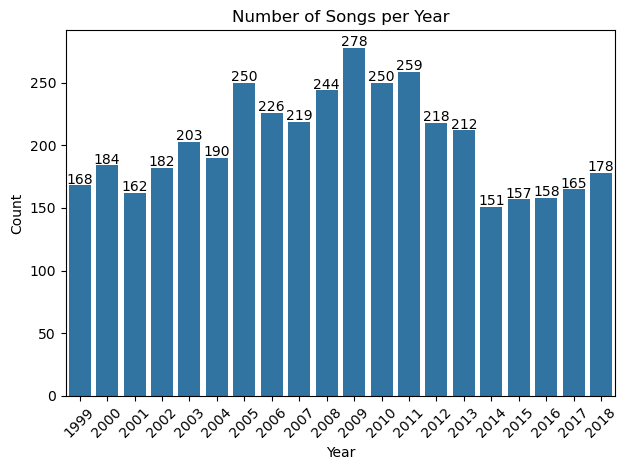

In [38]:
#song count graph
sns.barplot(data=song_count_df, x='year', y='count')
plt.title('Number of Songs per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
for i, value in enumerate(song_count_df['count']):
    plt.text(i, value + 10, str(value), ha='center', va='top', fontsize=10);

In [39]:
unique_artists = unique_songs.groupby('year')['main_artist'].nunique().reset_index(name='unique_artist')
unique_artists

,year,unique_artist
0,1999,110
1,2000,135
2,2001,119
3,2002,128
4,2003,147
5,2004,137
6,2005,168
7,2006,163
8,2007,145
9,2008,157


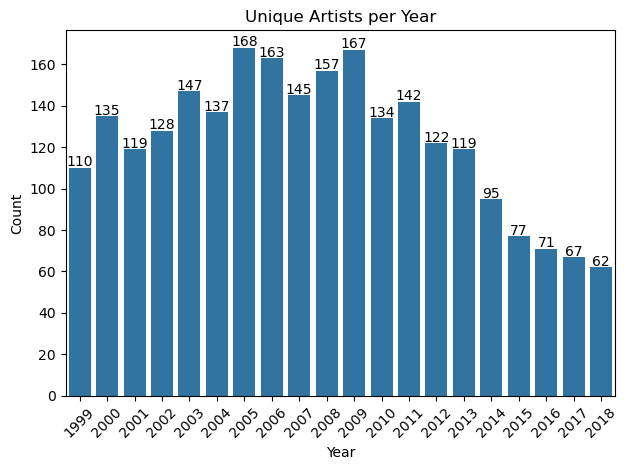

In [43]:
#unique artist count graph
sns.barplot(data=unique_artists, x='year', y='unique_artist')
plt.title('Unique Artists per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
for i, value in enumerate(unique_artists['unique_artist']):
    plt.text(i, value + 6, str(value), ha='center', va='top', fontsize=10);

In [90]:
calc_features = unique_songs.groupby('year')[['Energy', 'Danceability', 'Valence', 'Acousticness', 'Tempo', 'Instrumentalness', 'Duration', 'Speechiness']].mean().reset_index()
calc_features.round(3)

,year,Energy,Danceability,Valence,Acousticness,Tempo,Instrumentalness,Duration,Speechiness
0,1999,0.651,0.627,0.540,0.185,113.310,0.016,243742.226,0.074
1,2000,0.687,0.651,0.576,0.151,117.412,0.009,249552.875,0.080
2,2001,0.677,0.637,0.556,0.171,115.192,0.005,249274.685,0.089
3,2002,0.716,0.637,0.571,0.152,118.895,0.013,246413.786,0.096
4,2003,0.708,0.629,0.576,0.164,118.650,0.009,246822.463,0.115
5,2004,0.696,0.613,0.528,0.187,119.217,0.013,241518.000,0.096
6,2005,0.721,0.616,0.557,0.161,120.231,0.012,235409.624,0.108
7,2006,0.720,0.611,0.553,0.158,124.260,0.003,234986.478,0.094
8,2007,0.717,0.605,0.538,0.154,124.463,0.006,235571.233,0.095
9,2008,0.734,0.606,0.543,0.131,125.351,0.011,235173.545,0.085


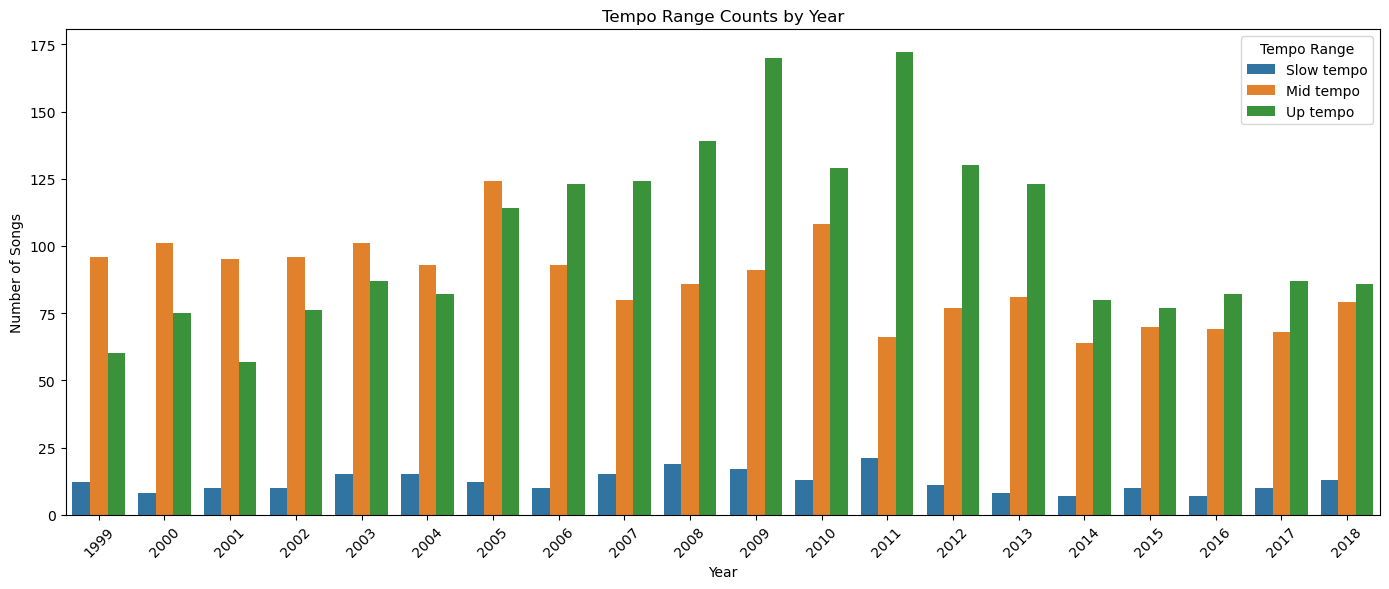

In [75]:
order = ['Slow tempo', 'Mid tempo', 'Up tempo']

plt.figure(figsize=(14, 6))
sns.barplot(data=tempo_range, x='year', y='count', hue='tempo_range', hue_order=order)

plt.title('Tempo Range Counts by Year')
plt.xlabel('Year')
plt.ylabel('Number of Songs')
plt.xticks(rotation=45)
plt.legend(title='Tempo Range')
plt.tight_layout()


In [88]:
top_artists = unique_songs['main_artist'].value_counts().reset_index(name='count').head(5)
top_artists['main_artist'] = top_artists['main_artist'].str.title()
top_artists

,main_artist,count
0,Drake,111
1,Taylor Swift,61
2,Lil Wayne,57
3,Justin Bieber,47
4,Tim Mcgraw,43


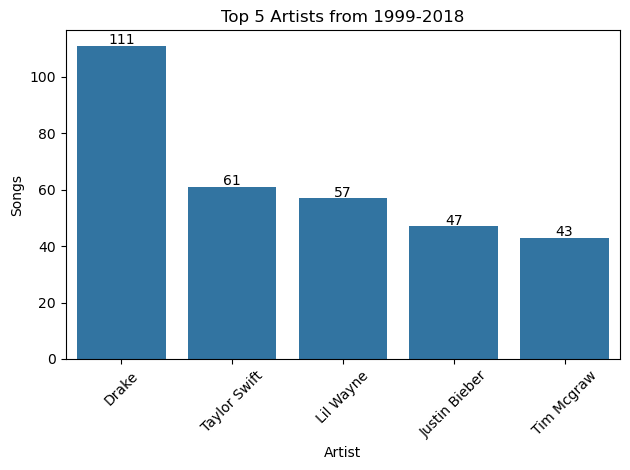

In [89]:
sns.barplot(x='main_artist', y='count', data=top_artists)
plt.title('Top 5 Artists from 1999-2018')
plt.ylabel('Songs')
plt.xlabel('Artist')
plt.xticks(rotation=45)
plt.tight_layout()

for i, value in enumerate(top_artists['count']):
    plt.text(i, value + 4.5, str(value), ha='center', va='top', fontsize=10);

In [112]:
idx = unique_songs.groupby('year')['Valence'].idxmax()
song_titles_happy = unique_songs.loc[idx, ['year', 'song_cleaned', 'main_artist', 'Valence', 'peak-rank']]
song_titles_happy

,year,song_cleaned,main_artist,Valence,peak-rank
59749,1999,every morning,sugar ray,0.975,3
57283,2000,the bad touch,bloodhound gang,0.970,52
55045,2001,what's your fantasy,ludacris,0.962,21
51912,2002,goodbye,jagged edge,0.971,58
47140,2003,beautiful,snoop dogg,0.961,6
44417,2004,just a little while,janet jackson,0.972,45
39599,2005,la camisa negra,juanes,0.969,89
36862,2006,lo que me gusta a mi,juanes,0.968,94
33402,2007,sexyback,justin timberlake,0.964,1
29183,2008,give it 2 me,madonna,0.972,57


In [111]:
idx = unique_songs.groupby('year')['Valence'].idxmin()
song_titles_sad = unique_songs.loc[idx, ['year', 'song_cleaned', 'main_artist', 'Valence', 'peak-rank']]
song_titles_sad

,year,song_cleaned,main_artist,Valence,peak-rank
59542,1999,the day the world went away,nine inch nails,0.0518,17
58318,2000,auld lang syne,kenny g,0.0390,7
54592,2001,thank you for loving me,bon jovi,0.1270,57
50596,2002,a new day has come,celine dion,0.0609,22
48105,2003,i wish you'd stay,brad paisley,0.0906,57
43027,2004,my immortal,evanescence,0.0776,7
40737,2005,the widow,the mars volta,0.1050,95
37691,2006,the ghost of you,my chemical romance,0.0372,84
32796,2007,you raise me up,josh groban,0.0981,76
27579,2008,the shock of the lightning,oasis,0.0375,93


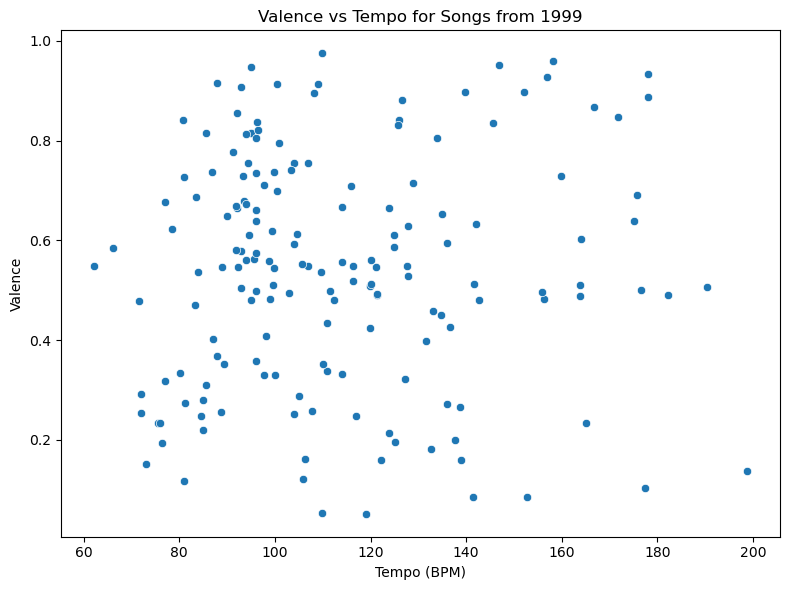

In [110]:
songs_1999 = unique_songs[unique_songs['year'] == 1999]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=songs_1999, x='Tempo', y='Valence')

plt.title('Valence vs Tempo for Songs from 1999')
plt.xlabel('Tempo (BPM)')
plt.ylabel('Valence')
plt.tight_layout()


In [114]:
#songs_1999['Tempo'].corr(songs_1999['Valence'])

songs_1999['Tempo'].corr(songs_1999['peak-rank'])

-0.06977996051285652

In [59]:
chart_and_att_df = pd.merge(updated_charts_df, updated_song_attributes_df, left_on=['song', 'main_artist'], right_on=['song', 'artist'], how='inner')
#grouped_chart_and_att_df = chart_and_att_df.groupby('song').first().reset_index()
chart_and_att_df.head(50)

,song,artist_x,peak-rank,weeks-on-board,year,featured_artist,main_artist,Acousticness,artist_y,Danceability,Duration,Energy,Explicit,Instrumentalness,Liveness,Loudness,Mode,Speechiness,Tempo,TimeSignature,Valence,song_cleaned
0,made for you,jake owen,32,20,2021,None,jake owen,0.7700,jake owen,0.581,238400,0.441,False,0.000028,0.1110,-6.829,1,0.0268,82.125,4,0.337,made for you
1,made for you,jake owen,32,19,2021,None,jake owen,0.7700,jake owen,0.581,238400,0.441,False,0.000028,0.1110,-6.829,1,0.0268,82.125,4,0.337,made for you
2,made for you,jake owen,32,18,2021,None,jake owen,0.7700,jake owen,0.581,238400,0.441,False,0.000028,0.1110,-6.829,1,0.0268,82.125,4,0.337,made for you
3,made for you,jake owen,32,17,2021,None,jake owen,0.7700,jake owen,0.581,238400,0.441,False,0.000028,0.1110,-6.829,1,0.0268,82.125,4,0.337,made for you
4,made for you,jake owen,32,16,2021,None,jake owen,0.7700,jake owen,0.581,238400,0.441,False,0.000028,0.1110,-6.829,1,0.0268,82.125,4,0.337,made for you
5,made for you,jake owen,32,15,2021,None,jake owen,0.7700,jake owen,0.581,238400,0.441,False,0.000028,0.1110,-6.829,1,0.0268,82.125,4,0.337,made for you
6,made for you,jake owen,32,14,2021,None,jake owen,0.7700,jake owen,0.581,238400,0.441,False,0.000028,0.1110,-6.829,1,0.0268,82.125,4,0.337,made for you
7,interlude,j. cole,8,3,2021,None,j. cole,0.9360,j. cole,0.521,99680,0.285,True,0.000168,0.1150,-14.619,0,0.1050,64.825,3,0.157,interlude
8,interlude,j. cole,8,2,2021,None,j. cole,0.9360,j. cole,0.521,99680,0.285,True,0.000168,0.1150,-14.619,0,0.1050,64.825,3,0.157,interlude
9,made for you,jake owen,32,13,2021,None,jake owen,0.7700,jake owen,0.581,238400,0.441,False,0.000028,0.1110,-6.829,1,0.0268,82.125,4,0.337,made for you


In [62]:
group_chart_and_att_df = chart_and_att_df.sort_values('peak-rank').drop_duplicates(subset=['song', 'main_artist'])
group_chart_and_att_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4963 entries, 18473 to 1164
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song              4963 non-null   object 
 1   artist_x          4963 non-null   object 
 2   peak-rank         4963 non-null   int64  
 3   weeks-on-board    4963 non-null   int64  
 4   year              4963 non-null   int32  
 5   featured_artist   783 non-null    object 
 6   main_artist       4963 non-null   object 
 7   Acousticness      4963 non-null   float64
 8   artist_y          4963 non-null   object 
 9   Danceability      4963 non-null   float64
 10  Duration          4963 non-null   int64  
 11  Energy            4963 non-null   float64
 12  Explicit          4963 non-null   bool   
 13  Instrumentalness  4963 non-null   float64
 14  Liveness          4963 non-null   float64
 15  Loudness          4963 non-null   float64
 16  Mode              4963 non-null   int64  
 

In [51]:
#New columns for Main and Featured Artists
featured_artists= ['featuring', '&', 'with']
def extract_featured(artist):
    for featured in featured_artists:
          if featured in artist:
            parts = artist.split(featured)
            if len(parts) > 1:
                return parts[1].strip()
    return None

def extract_main_artist(artist):
    for featured in featured_artists:
        if featured in artist:
            parts = artist.split(featured)
            return parts[0].strip()
    return artist.strip()

grouped_chart_and_att_df['featured_artist'] = grouped_chart_and_att_df['artist_x'].apply(extract_featured)
grouped_chart_and_att_df['main_artist'] = grouped_chart_and_att_df['artist_x'].apply(extract_main_artist)
grouped_chart_and_att_df['main_artist'].value_counts()

NameError: name 'grouped_chart_and_att_df' is not defined

In [ ]:
lyrics_df = lyrics_df.rename(columns={'ranking': 'rank'})
spotify_qualities_df = spotify_qualities_df.rename(columns={'Time_Signature': 'time_signature', 'Track': 'song', 'Year': 'year', 'Danceability': 'danceability', 'Energy': 'energy', 'Key': 'key', 'Loudness': 'loudness', 'Mode': 'mode', 'Speechiness': 'speechiness', 'Liveness': 'liveness', 'Valence': 'valence', 'Tempo': 'tempo'}) 
spotify_qualities_df.info()

In [ ]:
charts_df['datetime'] = pd.to_datetime(charts_df['date'])
charts_df['year'] = charts_df['datetime'].dt.year

In [ ]:
charts_df.info()

In [ ]:
charts_and_lyrics_df = pd.merge(charts_df, lyrics_df, on=['song'], how='inner')
pd.set_option('display.max_columns', None)
charts_and_lyrics_df.info()

In [ ]:
range_charts_and_lyrics_df = charts_and_lyrics_df[
    (charts_and_lyrics_df['year'] >= 1999) &
    (charts_and_lyrics_df['year'] <= 2023)]
no_repeats_range_charts_and_lyrics_df = range_charts_and_lyrics_df.groupby('song').first().reset_index()
no_repeats_range_charts_and_lyrics_df.head(10)

In [ ]:
#charts_and_lyrics_qualities_df = pd.merge(charts_and_lyrics_df, spotify_qualities_df, on=['year', 'song', 'time_signature', 'danceability', 'energy', 'loudness', 'speechiness', 'liveness', 'valence', 'tempo'], how='inner')
#pd.set_option('display.max_columns', None)
#charts_and_lyrics_qualities_df= charts_and_lyrics_qualities_df['song'].nunique()
#charts_and_lyrics_qualities_df.head(30)

In [ ]:
artists = sorted(charts_and_lyrics_df['artist'].astype(str).unique().tolist())
#artists